# Insurance prediction project

### Machine Learning regression project

**Goal** - Predict charges based on data

In [19]:
# Packages

import pandas as pd
import numpy as np

## 1. Data read 

In [20]:
import pandas as pd

df = pd.read_csv(r'C:\Users\groch\Desktop\JobPath\Statascratch\Time-Series---Neural-Networks\Data\insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
df = pd.get_dummies(df, columns=['region'])

## 2. EDA

In [22]:
df.isna().any()

age                 False
sex                 False
bmi                 False
children            False
smoker              False
charges             False
region_northeast    False
region_northwest    False
region_southeast    False
region_southwest    False
dtype: bool

In [23]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   bool   
 7   region_northwest  1338 non-null   bool   
 8   region_southeast  1338 non-null   bool   
 9   region_southwest  1338 non-null   bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 68.1 KB


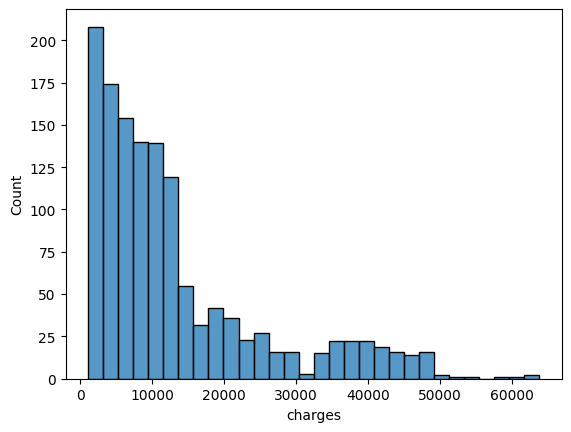

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['charges'])
plt.show()

### Target Distribution Analysis

The target variable (`charges`) exhibits a **strong right-skewed distribution** with a long heavy tail.
Most observations are concentrated at relatively low values, while a small number of cases reach
very high values.

This pattern indicates that the target is **not normally distributed** and contains **rare but
extreme values** that are likely meaningful rather than data errors.

#### Key observations:
- The distribution is highly **asymmetric** with a long right tail.
- A small number of observations have disproportionately large values.
- The variance increases with the magnitude of the target (heteroscedasticity).

#### Implications:
- Models assuming normally distributed errors (e.g. ordinary least squares linear regression)
  may perform poorly without adjustments.
- Loss functions that heavily penalize large errors (e.g. Mean Squared Error) may be dominated
  by extreme values, leading to suboptimal performance for the majority of observations.
- The extreme values should not be removed, as they likely represent valid, high-impact cases.

#### Recommended next steps:
- Apply a **logarithmic transformation** to the target variable to reduce skewness and stabilize variance.
- Use evaluation metrics that are more robust to outliers, such as **Mean Absolute Error (MAE)**.
- Compare linear models on transformed targets with **tree-based models** (e.g. Random Forest,
  Gradient Boosting) that can naturally handle non-linear relationships and heteroscedasticity.
- Inspect residuals after modeling to verify improvements in error structure.


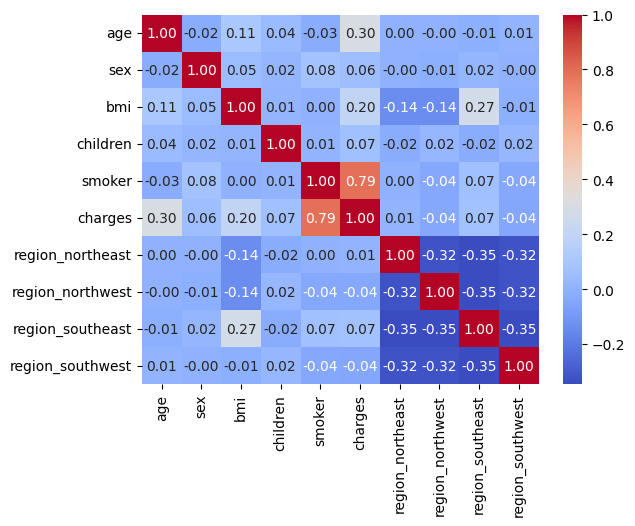

In [26]:
# Correlation

corr = df.corr()

plt.Figure(figsize= (20, 20))
sns.heatmap(corr, annot= True, cmap='coolwarm', fmt='.2f')
plt.show()

#### Key observations:
- High correletion between our target and smoker value

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

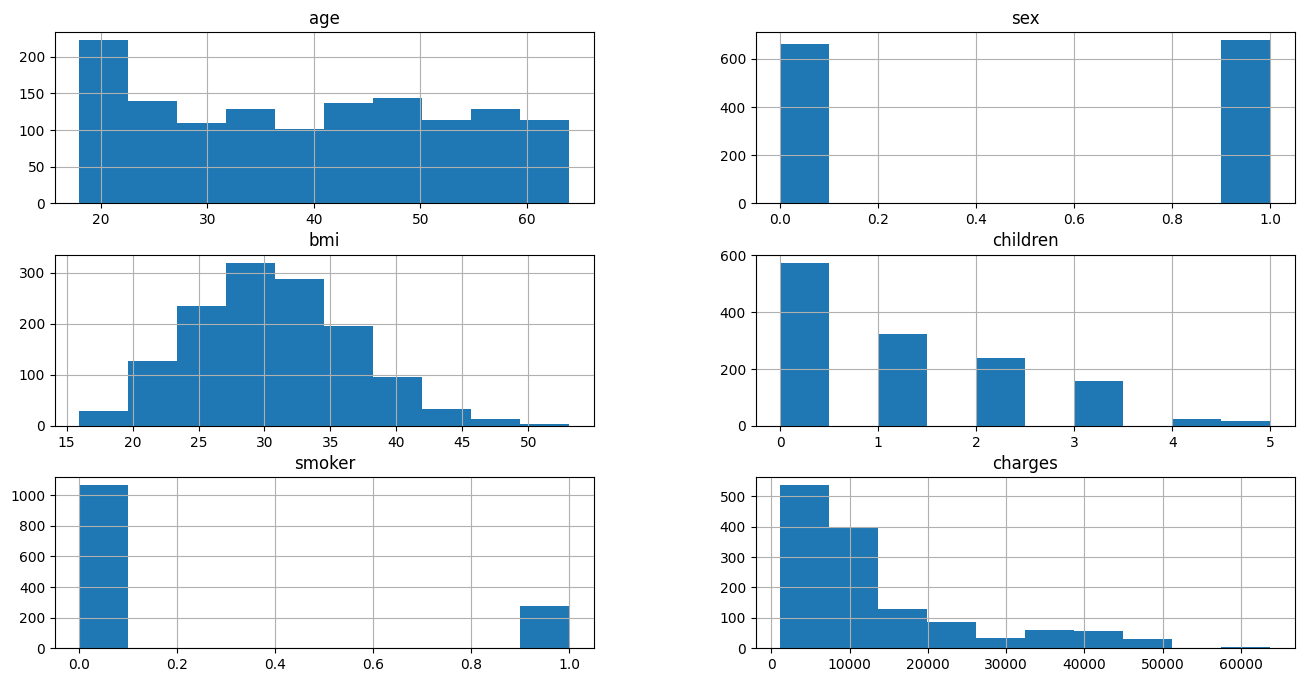

In [27]:
df.hist(figsize = (16, 8))

## 3. Data Preprocessing

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis = 1)
Y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size= 0.8, test_size= 0.2, random_state= 0)

## 4. Model training

##### Non log-transformed data & no scale sensitive

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

models = {
    "RF" : RandomForestRegressor(),
    "GB" : GradientBoostingRegressor()
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r = r2_score(y_test, pred)
    results[name] = {
        "Model" : name,
        "MAE" : mae,
        "MSE" : mse,
        "R2" : r
    }
    print(f'Model : {name} | Mean Absolute error: {mae} \nModel : {name} | Mean Squared error: {mse} | R2 : {r}')
    print(results)




Model : RF | Mean Absolute error: 2626.6146275157334 
Model : RF | Mean Squared error: 19078972.573233604 | R2 : 0.8801044611912107
{'RF': {'Model': 'RF', 'MAE': 2626.6146275157334, 'MSE': 19078972.573233604, 'R2': 0.8801044611912107}}
Model : GB | Mean Absolute error: 2451.9439769944775 
Model : GB | Mean Squared error: 16453575.725133384 | R2 : 0.8966029056688487
{'RF': {'Model': 'RF', 'MAE': 2626.6146275157334, 'MSE': 19078972.573233604, 'R2': 0.8801044611912107}, 'GB': {'Model': 'GB', 'MAE': 2451.9439769944775, 'MSE': 16453575.725133384, 'R2': 0.8966029056688487}}


##### Non Log-transformed & scale sensitive data

In [30]:
from sklearn.preprocessing import StandardScaler

# Scale data

scale = StandardScaler()

x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

model = SVR()
model.fit(x_train_scaled, y_train)
pred = model.predict(x_test_scaled)
MAE_SVR = mean_absolute_error(y_test, pred)
MSE_SVR = mean_squared_error(y_test, pred)
r = r2_score(y_test, pred)
print(f'Model : SVR | MAE : {MAE_SVR} | MSE : {MSE_SVR} | R2 : {r}')

results["SVR"] = {
    "Model" : model,
    "MAE" : MAE_SVR,
    "MSE" : MSE_SVR,
    "R2" : r
}



Model : SVR | MAE : 8590.78058685011 | MSE : 175486326.06583992 | R2 : -0.10278619755218843


##### Log transformed & scale sensitive data

In [31]:
# LR

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

model = LinearRegression()
model.fit(x_train_scaled, y_train_log)
pred_log = model.predict(x_test_scaled)
pred = np.exp(pred_log)
MAE_LR = mean_absolute_error(pred, y_test)
MSE_LR = mean_squared_error(pred, y_test)
r = r2_score(y_test, pred)
print(f'Model : {model} | MAE : {MAE_LR} | MSE : {MSE_LR} | R2 : {r}')

results["LR"] = {
    "Model" : model,
    "MAE" : MAE_LR,
    "MSE" : MSE_LR,
    "R2" : r
}



Model : LinearRegression() | MAE : 4213.570366132489 | MSE : 72142778.11367917 | R2 : 0.5466423980693147


In [32]:
# Results DF

print(results)

res2 = (pd.DataFrame(results).T.drop(columns = "Model").sort_values("MAE", ascending = False))
print(res2)

{'RF': {'Model': 'RF', 'MAE': 2626.6146275157334, 'MSE': 19078972.573233604, 'R2': 0.8801044611912107}, 'GB': {'Model': 'GB', 'MAE': 2451.9439769944775, 'MSE': 16453575.725133384, 'R2': 0.8966029056688487}, 'SVR': {'Model': SVR(), 'MAE': 8590.78058685011, 'MSE': 175486326.06583992, 'R2': -0.10278619755218843}, 'LR': {'Model': LinearRegression(), 'MAE': 4213.570366132489, 'MSE': 72142778.11367917, 'R2': 0.5466423980693147}}
             MAE              MSE        R2
SVR  8590.780587  175486326.06584 -0.102786
LR   4213.570366  72142778.113679  0.546642
RF   2626.614628  19078972.573234  0.880104
GB   2451.943977  16453575.725133  0.896603


## 5. Hiperparameter tuning

## 6. Feature Importance